In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset.h5_image_dataset import H5ImageDataset
import h5py

In [1]:
exists_path = []
total_min_navie_rmse, total_min_reversed_rmse, total_once_rmse, total_avg_rmse, total_rmse = 0, 0, 0, 0, 0 
count = 0

with open('/workspace/Marigold/results/Gopro_event_train_results.txt', 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]


    for line in lines:
        splits = line.split(' ')
        img_name, min_navie_rmse, min_reversed_rmse, once_rmse, avg_rmse = splits

        total_min_navie_rmse += float(min_navie_rmse)
        total_min_reversed_rmse += float(min_reversed_rmse)
        total_once_rmse += float(once_rmse)
        total_avg_rmse += float(avg_rmse)
        total_rmse += min(float(min_navie_rmse), float(min_reversed_rmse))

        if min_navie_rmse > min_reversed_rmse:
            count +=1

print('total_rmse:', total_rmse/len(lines))
print('total_min_navie_rmse:', total_min_navie_rmse/len(lines))
print('total_min_reversed_rmse:', total_min_reversed_rmse/len(lines))
print('total_once_rmse:', total_once_rmse/len(lines))
print('total_avg_rmse:', total_avg_rmse/len(lines))
print(count)


        


total_rmse: 0.021947061680427475
total_min_navie_rmse: 0.021948518698397364
total_min_reversed_rmse: 0.02805925206410874
total_once_rmse: 0.02248130160271991
total_avg_rmse: 0.022480330257406613
3


0.08040456


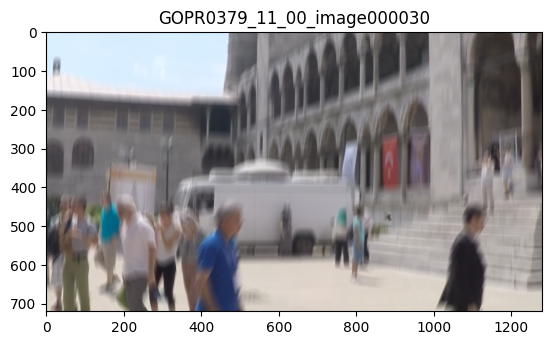

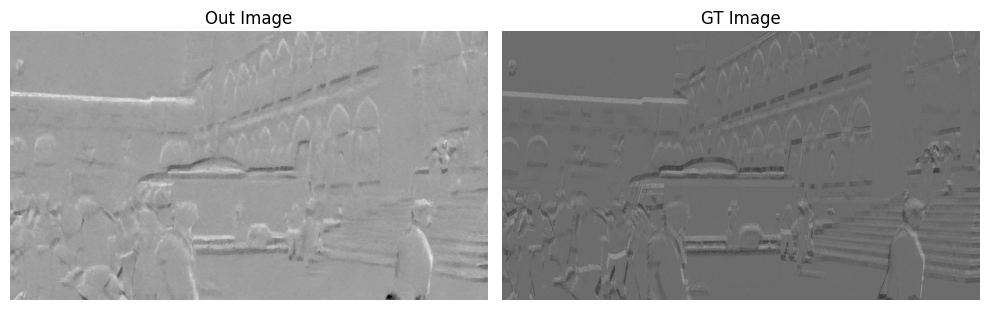

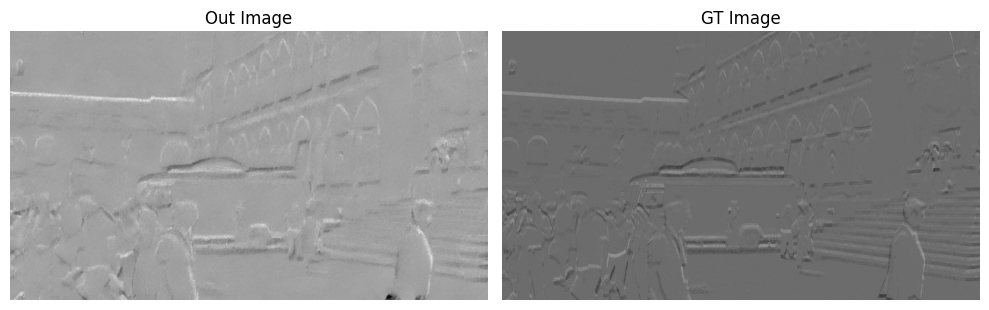

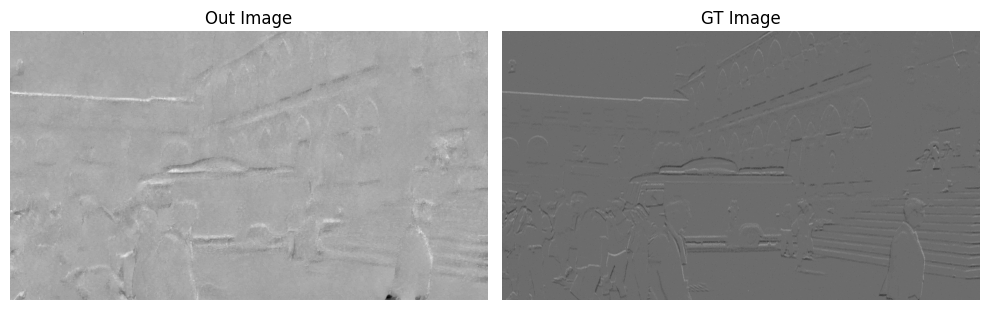

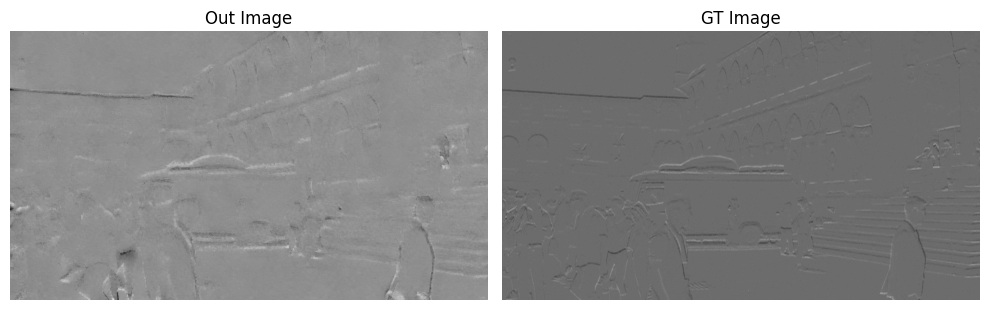

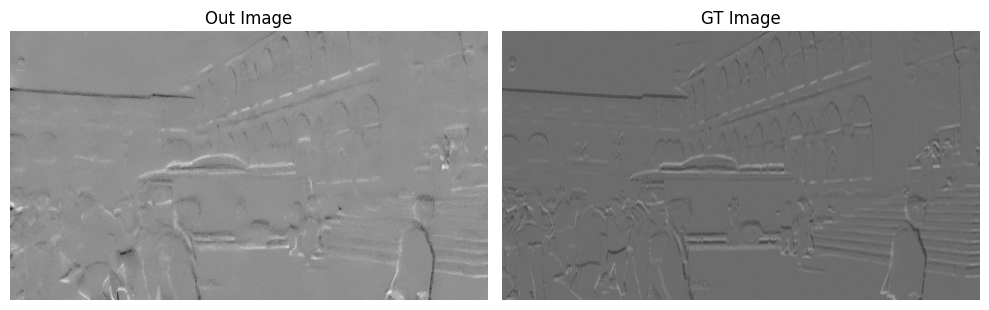

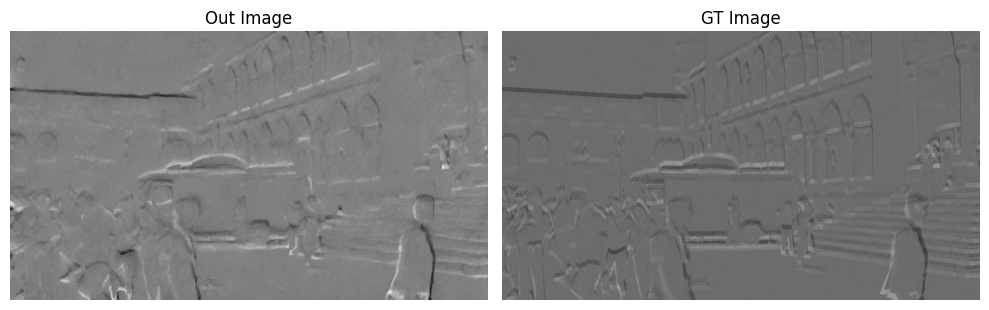

In [4]:
mother_path = '/workspace/Marigold/results/Gopro_Event_Train'
scene_list = os.listdir(mother_path)
scene_list = sorted(scene_list)



for scene in scene_list[7:]:
    scene_path = os.path.join(mother_path, scene)

    gt_dataset = h5py.File(os.path.join('/workspace/data/GOPRO/train', f'{scene}.h5'), 'r')

    img_list = os.listdir(scene_path)
    img_list.sort()
    for img in img_list[30:]:
        
        number = img[5:] # image000001
        number = '000' + number
        voxel_key = f'voxel{number}'
        voxel_original = gt_dataset['voxels'][voxel_key][:] # 6,H,W
        voxel = np.transpose(voxel_original, (1, 2, 0))
        voxel = (voxel - np.min(voxel)) / (np.max(voxel) - np.min(voxel))  #[0,1]
        

        img_key = voxel_key.replace('voxel', 'image')
        blur_img = gt_dataset['images'][img_key][:] # 3,H,W
        blur_img = np.transpose(blur_img, (1, 2, 0))
        blur_img = blur_img[:,:,::-1]
        

        img_path = os.path.join(scene_path, img)
        output_path = os.path.join(img_path, 'out.npy')
        out_original = np.load(output_path)
        out = (out_original + 1) / 2

        # caculate rmse
        diff = out - voxel
        diff_power = diff ** 2
        rmse = np.sqrt(np.mean(diff_power))
        print(rmse)
        
        plt.imshow(blur_img)
        plt.title(f'{scene}_{img}')
        plt.show()
        for i in range(6):
            # 첫 번째 이미지 처리
            out_img = out[:, :, i]
            out_img = (out_img * 255).astype('uint8')  # 정수형으로 변환
            out_img = Image.fromarray(out_img)

            # 두 번째 이미지 처리
            voxel_img = voxel[:, :, i]
            voxel_img = (voxel_img * 255).astype('uint8')  # 정수형으로 변환
            voxel_img = Image.fromarray(voxel_img)

            # 1행 2열 서브플롯 생성
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))

            axs[0].imshow(out_img, cmap='gray')
            axs[0].set_title('Out Image')
            axs[0].axis('off')

            axs[1].imshow(voxel_img, cmap='gray')
            axs[1].set_title('GT Image')
            axs[1].axis('off')

            plt.tight_layout()
            plt.show()

        break

    break

In [4]:
print(np.min(voxel_original), np.max(voxel_original))

-16.0 20.0


In [6]:
print(np.min(out_original), np.max(out_original))

-0.5828476 0.54211354
